# Bước 1: Import thư viện

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 2: Tải và tổng quan về dữ liệu

In [2]:
sms = pd.read_csv("emails.csv", encoding="latin-1")
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ["message", "label_num"]
sms["label"] = sms["label_num"].map({0: "ham", 1: "spam"})


In [3]:
sms.describe()

,label_num
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Text(0.5, 0, 'Message Length')

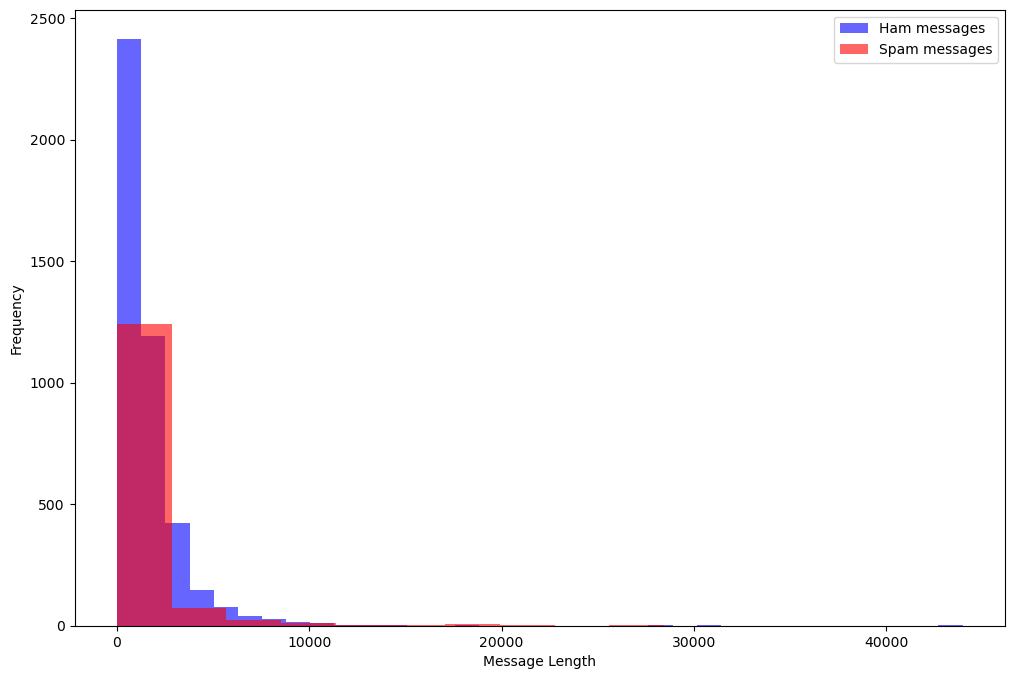

In [4]:
sms['message_len'] = sms.message.apply(len)

plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [5]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4360.0,4360.000000
mean,0.0,1631.918119
std,0.0,1959.664549
min,0.0,13.000000
25%,0.0,577.750000
50%,0.0,1122.000000
75%,0.0,2037.250000
max,0.0,43952.000000


In [6]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,1368.0,1368.000000
mean,1.0,1317.257310
std,0.0,2271.372893
min,1.0,18.000000
25%,1.0,401.500000
50%,1.0,693.500000
75%,1.0,1250.250000
max,1.0,28432.000000


# Bước 3: Tiền xử lý dữ liệu

In [7]:
lemmatizer = WordNetLemmatizer()
STOPWORDS = stopwords.words("english") 

def text_process(mess):
    # Xóa dấu câu
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    # Chuyển thành chữ thường, tách từ, loại bỏ stopwords và lemmatize
    words = [
        lemmatizer.lemmatize(word.lower())
        for word in nopunc.split()
        if word.lower() not in STOPWORDS
    ]
    return " ".join(words)

sms["clean_msg"] = sms.message.apply(text_process)


In [8]:
# vcl = sms["clean_msg"].iloc[30]
# vc = sms["message"].iloc[30]
# vc
# sms[sms.message_len == 240].message.iloc[0]
sms[sms.message_len == 240].clean_msg.iloc[0]


'subject branded softs roxio easy medium creator 7 0 19 95 http broadcaster wxget com sing kind man cannot choose cease man minimal art maximum explanation'

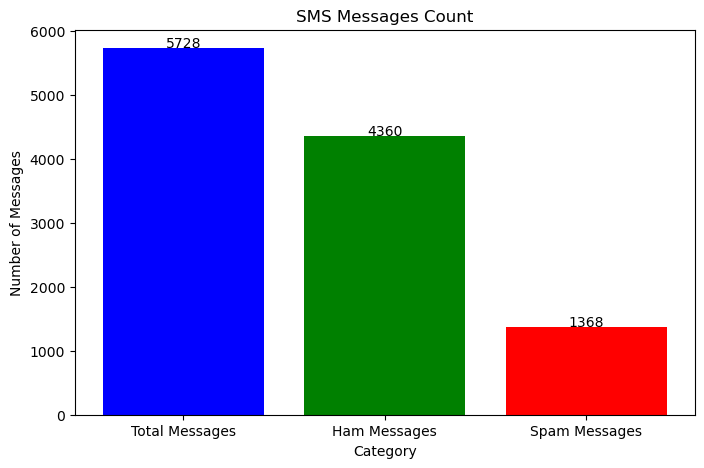

In [9]:
# Tổng hợp dữ liệu
total_messages = sms.shape[0]
ham_messages = sms[sms["label"] == "ham"].shape[0]
spam_messages = sms[sms["label"] == "spam"].shape[0]

# Dữ liệu cho biểu đồ
categories = ["Total Messages", "Ham Messages", "Spam Messages"]
counts = [total_messages, ham_messages, spam_messages]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=["blue", "green", "red"])

# Thêm số liệu trên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, str(yval), ha='center', fontsize=10)

# Đặt tiêu đề và nhãn
plt.title("SMS Messages Count")
plt.ylabel("Number of Messages")
plt.xlabel("Category")

# Hiển thị biểu đồ
plt.show()

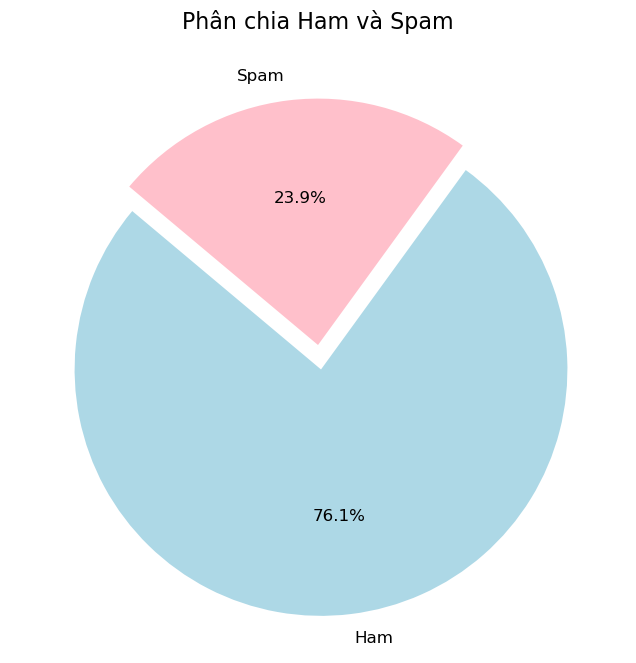

In [21]:
# Tính toán tỷ lệ phần trăm
ham_messages = sms[sms["label"] == "ham"].shape[0]
spam_messages = sms[sms["label"] == "spam"].shape[0]
total_messages = ham_messages + spam_messages

# Dữ liệu cho biểu đồ tròn
sizes = [ham_messages, spam_messages]
labels = ["Ham", "Spam"]
colors = ["lightblue", "pink"]
explode = (0.1, 0)  # Làm nổi bật phần Spam

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, labels=labels, colors=colors, explode=explode,
    autopct="%1.1f%%", startangle=140, textprops={"fontsize": 12}
)
plt.title("Phân chia Ham và Spam", fontsize=16)
plt.show()

# Bước 4: Chia tập dữ liệu

In [10]:
X = sms.clean_msg
y = sms.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

(5728,)
(5728,)
(4296,)
(1432,)
(4296,)
(1432,)


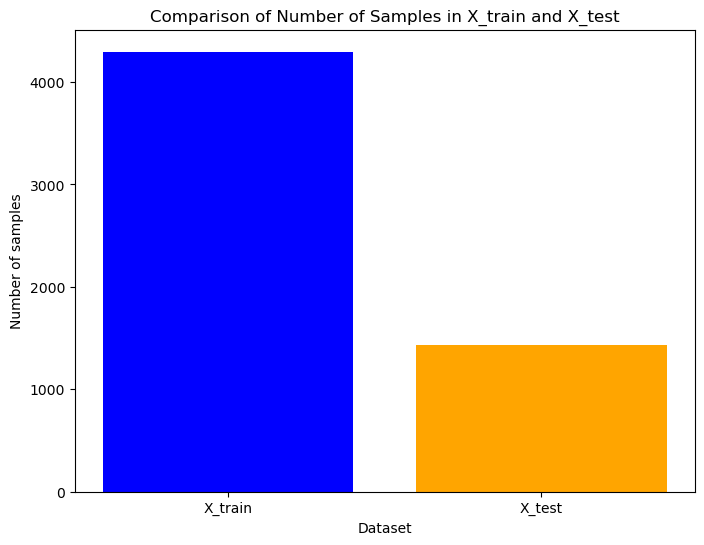

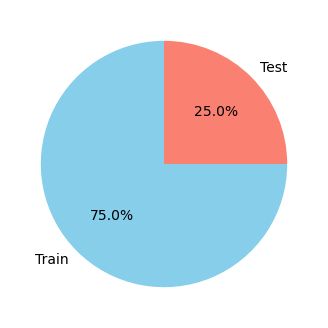

In [11]:
# Số lượng mẫu trong tập huấn luyện và kiểm tra
train_size = X_train.shape[0]
test_size = X_test.shape[0]

print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(['X_train', 'X_test'], [train_size, test_size], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of samples')
plt.title('Comparison of Number of Samples in X_train and X_test')
plt.show()

# Dữ liệu cho biểu đồ tròn
sizes = [train_size, test_size]
labels = ['Train', 'Test']
colors = ['skyblue', 'salmon']

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

# Bước 5: Tạo đặc trưng TF-IDF

In [12]:
tfidf_vectorizer = TfidfVectorizer()  # Giới hạn số lượng đặc trưng
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Bước 6: Thử nghiệm các mô hình

Model: Logistic Regression
Accuracy: 0.9846368715083799

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1083
           1       1.00      0.94      0.97       349

    accuracy                           0.98      1432
   macro avg       0.99      0.97      0.98      1432
weighted avg       0.98      0.98      0.98      1432


Confusion Matrix:
 [[1082    1]
 [  21  328]]


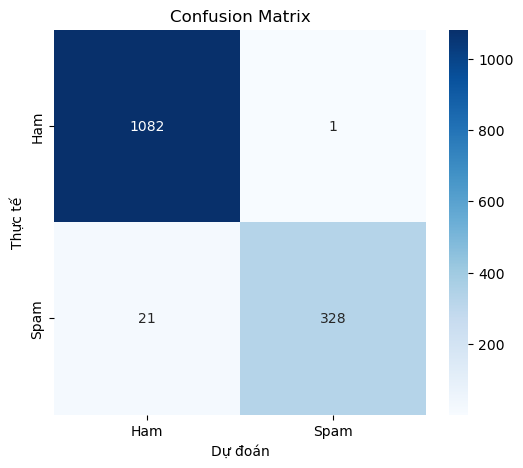

In [13]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)  # Huấn luyện mô hình
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Hiển thị thông số
print("Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Vẽ confusion matrix dưới dạng biểu đồ
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


Model: SVM
Accuracy: 0.9916201117318436

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1083
           1       1.00      0.97      0.98       349

    accuracy                           0.99      1432
   macro avg       0.99      0.98      0.99      1432
weighted avg       0.99      0.99      0.99      1432


Confusion Matrix:
 [[1082    1]
 [  11  338]]


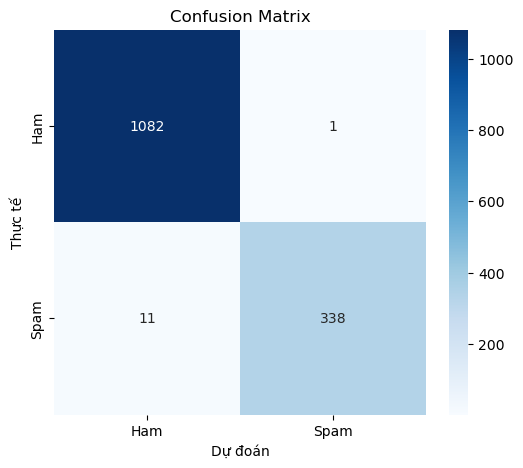

In [14]:
# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)  # Huấn luyện mô hình
y_pred_svm = svm_model.predict(X_test_tfidf)

# Hiển thị thông số
print("Model: SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)


# Vẽ confusion matrix dưới dạng biểu đồ
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


Model: Naive Bayes
Accuracy: 0.895949720670391

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1083
           1       1.00      0.57      0.73       349

    accuracy                           0.90      1432
   macro avg       0.94      0.79      0.83      1432
weighted avg       0.91      0.90      0.89      1432


Confusion Matrix:
 [[1083    0]
 [ 149  200]]


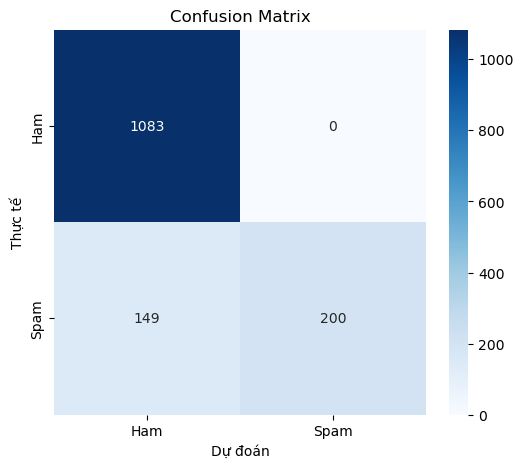

In [15]:
# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)  # Huấn luyện mô hình
y_pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)

# Hiển thị thông số
print("Model: Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_naive_bayes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_naive_bayes))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_naive_bayes)

# Vẽ confusion matrix dưới dạng biểu đồ
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


# Bước 7: Dự đoán trên tin nhắn mới

In [16]:
# Danh sách các tin nhắn mới
new_messages = [
    "Hi, how are you? Are we still on for dinner tonight?",  # Ham
    "Free entry in a $1000 competition! Text WIN to 12345 to claim.",  # Spam
    "Can you call me back when you get this message?",  # Ham
    "Urgent! Your account has been compromised. Click the link to secure it: http://secure-me.com",  # Spam
    "Hey, don't forget to bring your documents to the meeting tomorrow.",  # Ham
    "You have won a free vacation to the Bahamas! Call us now at 1800-SPAM.",  # Spam
   
]

# Dự đoán tin nhắn mới trên tất cả các mô hình
for message in new_messages:
    processed_message = text_process(message)  # Tiền xử lý tin nhắn
    message_tfidf = tfidf_vectorizer.transform([processed_message])  # Chuyển đổi sang TF-IDF
    
    # Logistic Regression
    logistic_pred = logistic_model.predict(message_tfidf)
    print(f"Message: {message}")
    print(f"Logistic Regression Prediction: {'Spam' if logistic_pred[0] == 1 else 'Ham'}")

    # SVM
    svm_pred = svm_model.predict(message_tfidf)
    print(f"SVM Prediction: {'Spam' if svm_pred[0] == 1 else 'Ham'}")

    # Naive Bayes
    naive_bayes_pred = naive_bayes_model.predict(message_tfidf)
    print(f"Naive Bayes Prediction: {'Spam' if naive_bayes_pred[0] == 1 else 'Ham'}\n")


Message: Hi, how are you? Are we still on for dinner tonight?
Logistic Regression Prediction: Ham
SVM Prediction: Ham
Naive Bayes Prediction: Ham

Message: Free entry in a $1000 competition! Text WIN to 12345 to claim.
Logistic Regression Prediction: Spam
SVM Prediction: Spam
Naive Bayes Prediction: Ham

Message: Can you call me back when you get this message?
Logistic Regression Prediction: Ham
SVM Prediction: Ham
Naive Bayes Prediction: Ham

Message: Urgent! Your account has been compromised. Click the link to secure it: http://secure-me.com
Logistic Regression Prediction: Spam
SVM Prediction: Spam
Naive Bayes Prediction: Spam

Message: Hey, don't forget to bring your documents to the meeting tomorrow.
Logistic Regression Prediction: Ham
SVM Prediction: Ham
Naive Bayes Prediction: Ham

Message: You have won a free vacation to the Bahamas! Call us now at 1800-SPAM.
Logistic Regression Prediction: Ham
SVM Prediction: Ham
Naive Bayes Prediction: Ham

